In [2]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
import warnings

In [3]:
os.getcwd()
directory = os.getcwd()
print(directory)

C:\Users\joche\great_learning\Regression_N_Prediction


In [4]:
os.chdir('C:/Users/joche/great_learning/DecisionTree_OrangeBook')

In [5]:
os.getcwd()
directory = os.getcwd()
print(directory)

C:\Users\joche\great_learning\DecisionTree_OrangeBook


In [6]:
flower = pd.read_csv('flowers_csv.csv')

In [7]:
df_in = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [8]:
df_in.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
flower_copy = flower.copy()

In [11]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
flower.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [13]:
flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:ylabel='Frequency'>

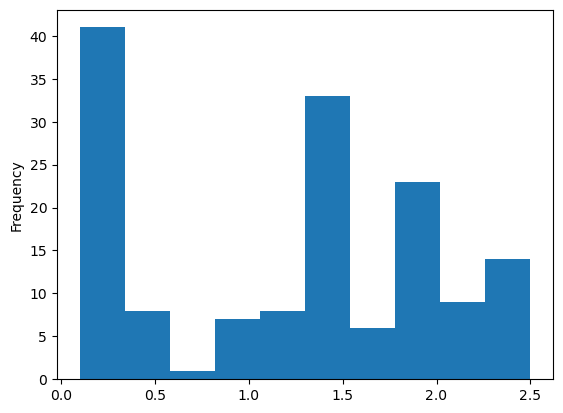

In [14]:
flower['petal_width'].plot.hist()

In [15]:
flower.size

750

In [16]:
flower.shape

(150, 5)

In [17]:
all_classes=flower['species'].values

In [18]:
all_inputs=flower[['sepal_length','sepal_width','petal_length','petal_width']].values

In [19]:
all_inputs[0]

array([5.1, 3.5, 1.4, 0.2])

In [18]:
type(all_classes)

numpy.ndarray

In [19]:
type(all_inputs)

numpy.ndarray

In [22]:
print(all_classes)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [23]:
### Isolating and Identifying The Unique Values

output = []
for x in all_classes:
    if x not in output:
        output.append(x)
print(output)

['setosa', 'versicolor', 'virginica']


In [24]:
from sklearn.model_selection import train_test_split
(train_inputs,test_inputs,train_classes,test_classes)=train_test_split(all_inputs,all_classes,train_size=0.7,random_state=1)

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
dtc=classifier.fit(train_inputs,train_classes)

In [26]:
print("Accuracy:",dtc.score(test_inputs,test_classes))

Accuracy: 0.9555555555555556


[Text(0.4, 0.9, '[4.7 3.2 1.3 0.2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]\nclass = setosa'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, '[4.6 3.1 1.5 0.2] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]\nclass = setosa'),
 Text(0.2, 0.5, '[4.7 3.2 1.3 0.2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = setosa'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = setosa'),
 Text(0.3, 0.3, '[5.1 3.5 1.4 0.2] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = setosa'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = setosa'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = setosa'),
 Text(0.8, 0.5, '[4.7 3.2 1.3 0.2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = setosa'),
 Text(0.7, 0.3, '[4.9 3.  1.4 0.2] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = setosa'),
 Text(0.6, 0.1, 'gini =

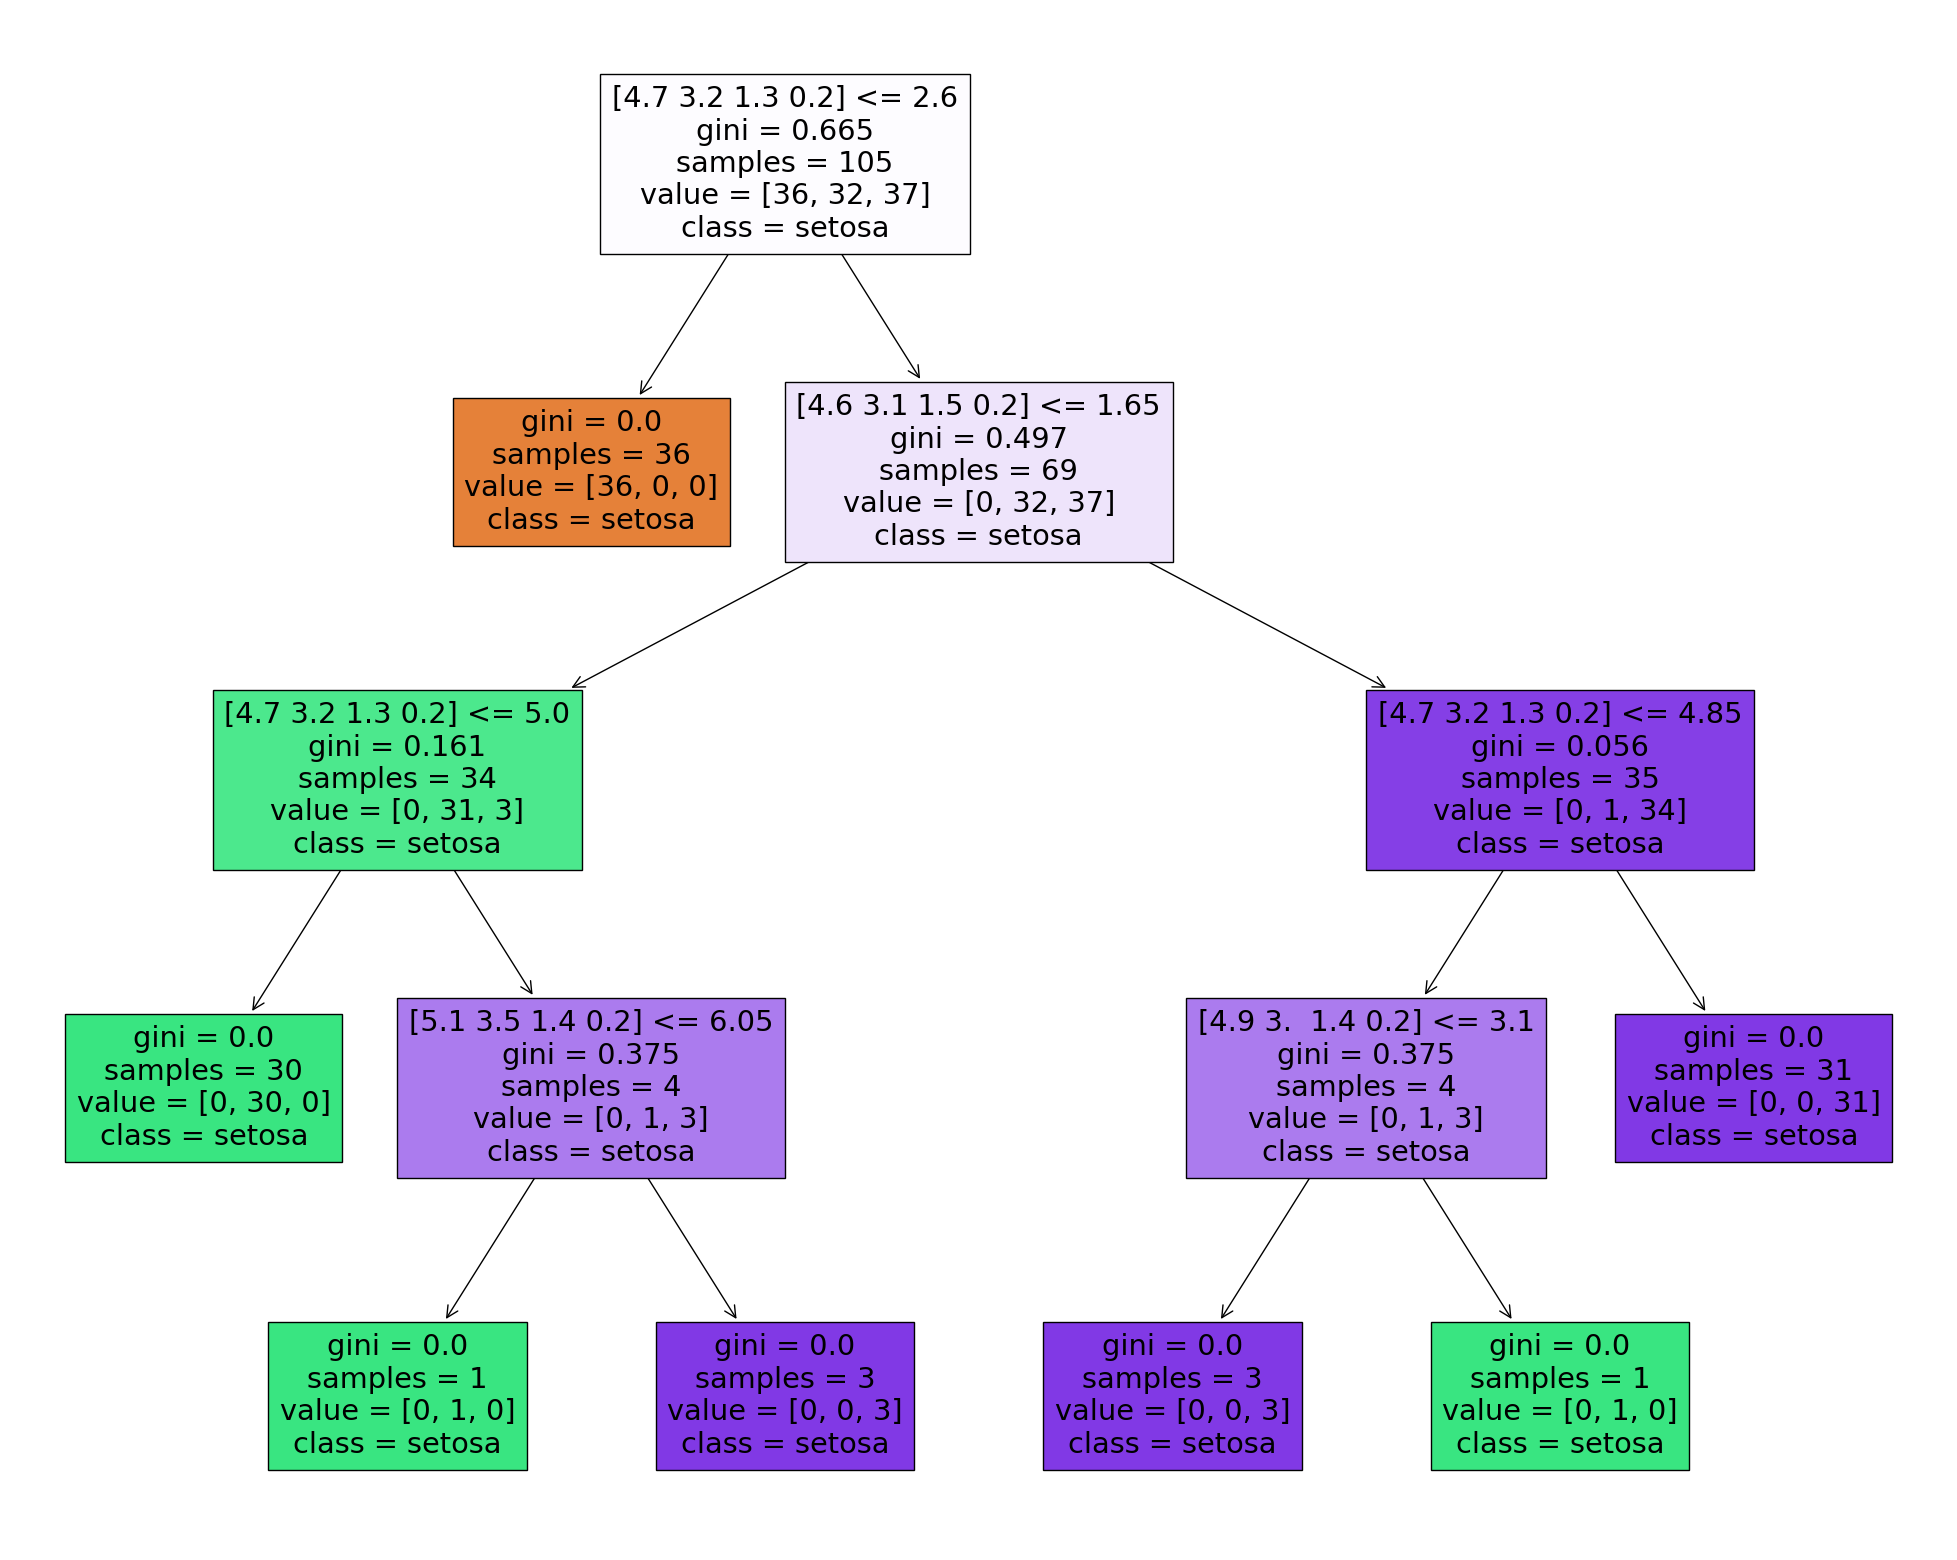

In [27]:
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#clf = tree.DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 3)
fig = plt.figure(figsize=(25,20))
# tree.plot_tree(clf,feature_names =all_inputs , class_names=all_classes, filled=True)
tree.plot_tree(dtc,feature_names =all_inputs , class_names=all_classes, filled=True)
# tree.plot_tree(dtc,feature_names =all_classes , class_names=all_inputs, filled=True)

In [28]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



In [31]:
import graphviz
dot_datatc = tree.export_graphviz(dtc,out_file=None)
graph = graphviz.Source(dot_datatc)
graph.render("iiris_treetc")

'iiris_treetc.pdf'

In [32]:
dot_datadtc = tree.export_graphviz(dtc, out_file=None, 
                      feature_names=all_inputs,  
                      class_names=all_classes,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graphdtc = graphviz.Source(dot_datatc)  
graphdtc

ValueError: Length of feature_names, 150 does not match number of features, 4

<AxesSubplot:>

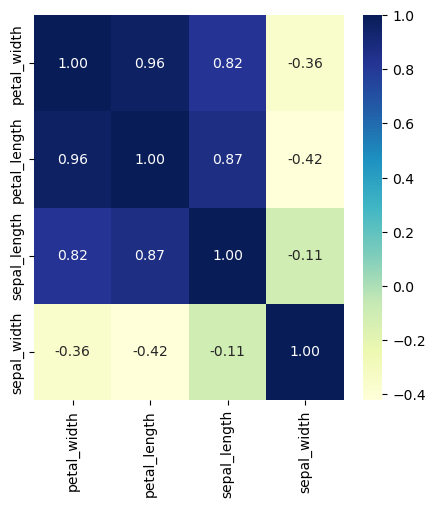

In [33]:
import seaborn as sns
plt.figure(figsize=(5,5))
num_cols=['petal_width','petal_length','sepal_length','sepal_width']
sns.heatmap(flower[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

### Random Forest

In [34]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

In [35]:
iris = load_iris()

In [36]:
type(iris)

sklearn.utils._bunch.Bunch

In [37]:
df_iris=pd.DataFrame(iris.data,columns=iris.feature_names)

In [38]:
type(df_iris)

pandas.core.frame.DataFrame

In [39]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
df_iris['species']=pd.Categorical.from_codes(iris.target,iris.target_names)

In [41]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
df_iris['is_train'] = np.random.uniform(0,1,len(df_iris)) <= .65

In [43]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [44]:
train=df_iris[df_iris['is_train']==True]

In [45]:
test=df_iris[df_iris['is_train']==False]

In [46]:
print(len(train))

97


In [47]:
print(len(test))

53


In [48]:
features = df_iris.columns[:4]

In [49]:
print(features)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [50]:
num_species = pd.factorize(train['species'])[0]

In [51]:
print(num_species)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [52]:
classifier=RandomForestClassifier(n_jobs=2,random_state=0)

In [53]:
classifier.fit(train[features],num_species)

RandomForestClassifier(n_jobs=2, random_state=0)

In [54]:
classifier.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [55]:
# Line 29
names=iris.target[classifier.predict(test[features])]

In [56]:
print(names[0:4])

[0 0 0 0]


In [57]:
print(test['species'].head)

<bound method NDFrame.head of 1          setosa
7          setosa
8          setosa
10         setosa
13         setosa
17         setosa
18         setosa
19         setosa
20         setosa
21         setosa
23         setosa
27         setosa
31         setosa
38         setosa
39         setosa
42         setosa
44         setosa
45         setosa
52     versicolor
56     versicolor
62     versicolor
66     versicolor
68     versicolor
70     versicolor
72     versicolor
74     versicolor
83     versicolor
89     versicolor
91     versicolor
93     versicolor
98     versicolor
100     virginica
102     virginica
103     virginica
109     virginica
111     virginica
112     virginica
114     virginica
116     virginica
118     virginica
119     virginica
120     virginica
122     virginica
128     virginica
137     virginica
138     virginica
140     virginica
143     virginica
144     virginica
145     virginica
147     virginica
148     virginica
149     virginica
Name: species, d

In [58]:
print(classifier.predict_proba(test[features])[0:10])

[[0.99 0.   0.01]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.98 0.02 0.  ]
 [1.   0.   0.  ]
 [0.99 0.01 0.  ]
 [1.   0.   0.  ]]


In [59]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

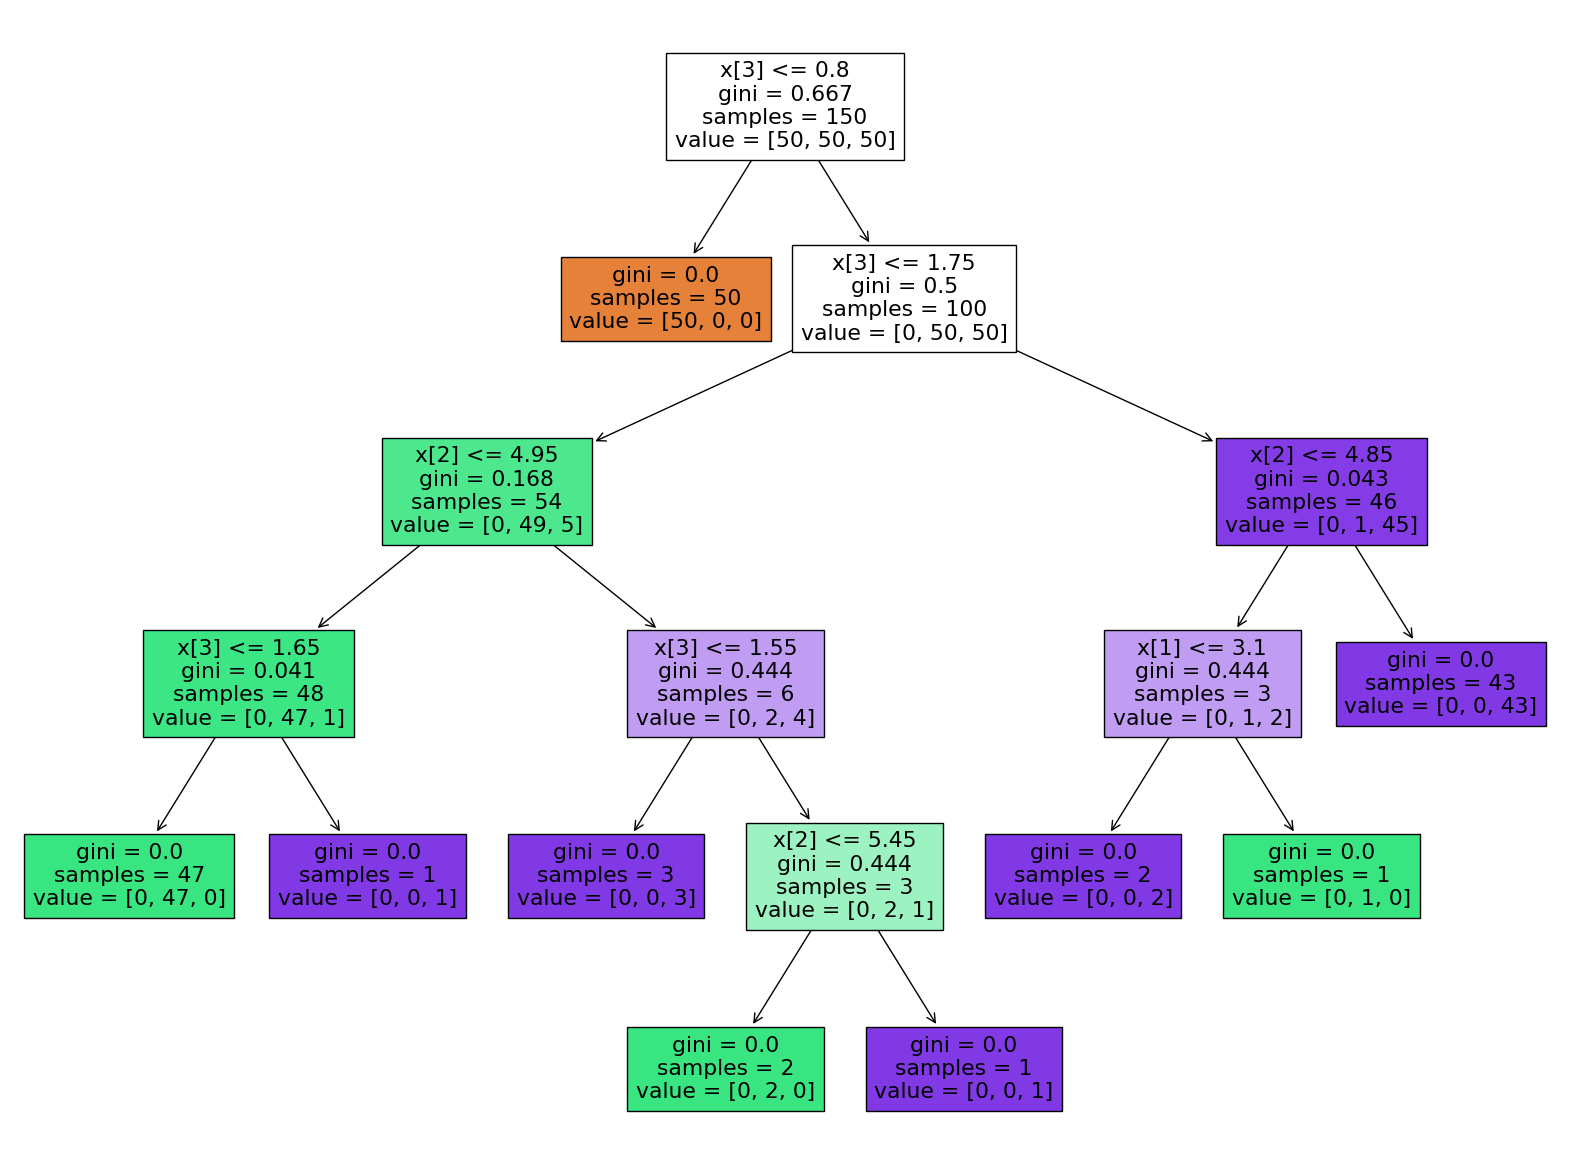

In [60]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf,filled=True)

# conda install python-graphviz

In [61]:
import graphviz
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iiris_tree")

'iiris_tree.pdf'

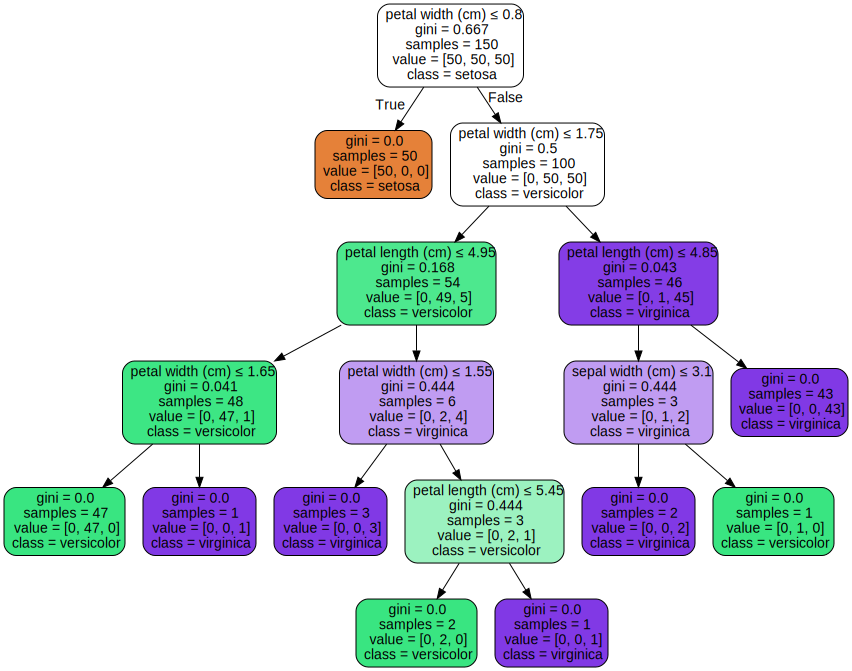

In [63]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=5)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



# Not available
#conda install dtreeviz

In [68]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [69]:
def predict(sepal_length, sepal_width, petal_length, petal_width):
    if petal length (cm) <= 2.45:
        return [[50.  0.  0.]]
    else:  # if petal length (cm) > 2.45
        if petal width (cm) <= 1.75:
            if petal length (cm) <= 4.95:
                return [[ 0. 47.  1.]]
            else:  # if petal length (cm) > 4.95
                return [[0. 2. 4.]]
        else:  # if petal width (cm) > 1.75
            if petal length (cm) <= 4.85:
                return [[0. 1. 2.]]
            else:  # if petal length (cm) > 4.85
                return [[ 0.  0. 43.]]

SyntaxError: invalid syntax (3062936715.py, line 2)

In [70]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
    return rules    

In [71]:
rules = get_rules(clf, iris.feature_names, iris.target_names)
for r in rules:
    print(r)

if (petal width (cm) <= 0.8) then class: setosa (proba: 100.0%) | based on 50 samples
if (petal width (cm) > 0.8) and (petal width (cm) <= 1.75) and (petal length (cm) <= 4.95) and (petal width (cm) <= 1.65) then class: versicolor (proba: 100.0%) | based on 47 samples
if (petal width (cm) > 0.8) and (petal width (cm) > 1.75) and (petal length (cm) > 4.85) then class: virginica (proba: 100.0%) | based on 43 samples
if (petal width (cm) > 0.8) and (petal width (cm) <= 1.75) and (petal length (cm) > 4.95) and (petal width (cm) <= 1.55) then class: virginica (proba: 100.0%) | based on 3 samples
if (petal width (cm) > 0.8) and (petal width (cm) > 1.75) and (petal length (cm) <= 4.85) and (sepal width (cm) <= 3.1) then class: virginica (proba: 100.0%) | based on 2 samples
if (petal width (cm) > 0.8) and (petal width (cm) <= 1.75) and (petal length (cm) > 4.95) and (petal width (cm) > 1.55) and (petal length (cm) <= 5.45) then class: versicolor (proba: 100.0%) | based on 2 samples
if (petal w